In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [ ]:
import xgboost as xgb
from xgboost.sklearn import  XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [ ]:
def plot_corr(dataframe,size=50):                         
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')

In [ ]:
data = pd.read_csv('facies_finals.csv')

In [ ]:
data.shape

(4149, 27)

In [ ]:
my_data = data.iloc[:,2:27]                             
my_data.describe()                                

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,Archies,NM_M,RELPOS,GR_entropy_foot5,ILD_log10_entropy_foot5,DeltaPHI_entropy_foot5,PE_entropy_foot5,PHIND_entropy_foot5,GRgradient_dx5,ILD_log10gradient_dx5,DeltaPHIgradient_dx5,PHINDgradient_dx5,PEgradient_dx5,Marine_ratio_100_centered,dist_M_up,dist_M_down,dist_NM_up,dist_NM_down
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.00000,4149.000000,4149.000000
mean,2906.867438,64.933985,0.659566,4.402484,13.201066,3.761512,0.691400,1.518438,0.521852,0.803171,0.780169,0.870552,0.747660,0.832629,-0.001515,0.000073,0.000096,-0.002119,0.000207,1.522436,3.747289,5.09677,6.640034,4.534225
std,133.300164,30.302530,0.252703,5.274947,7.132846,0.839810,0.451425,0.499720,0.286644,0.729118,0.740463,0.720218,0.714613,0.738651,1.953975,0.009369,0.400583,0.516156,0.048861,0.235857,7.020922,7.75078,10.206235,8.838803
min,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,-3.839972,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24.572000,-0.062100,-3.420000,-4.675000,-0.255200,1.000000,-1.000000,0.00000,-1.000000,-1.000000
25%,2821.500000,44.730000,0.498000,1.600000,8.500000,3.200000,0.410753,1.000000,0.277000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.575000,-0.004000,-0.153600,-0.145000,-0.020000,1.380000,0.000000,0.00000,0.000000,0.000000
50%,2932.500000,64.990000,0.639000,4.300000,12.020000,3.600000,0.581133,2.000000,0.528000,0.918296,0.918296,0.918296,0.918296,0.918296,0.060500,-0.000100,0.000000,0.001850,0.000000,1.510000,0.000000,0.00000,0.000000,0.000000
75%,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,0.899333,2.000000,0.769000,1.584963,1.584963,1.584963,1.584963,1.584963,0.627100,0.004000,0.160000,0.145000,0.020000,1.670000,5.500000,8.50000,10.500000,5.500000
max,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,6.976266,2.000000,1.000000,1.584963,1.584963,1.584963,1.584963,1.584963,23.242000,0.100100,2.710000,7.000000,0.440000,2.000000,46.000000,46.00000,51.500000,47.000000


In [ ]:
correlated_features = set()
correlation_matrix = data.drop('Facies', axis=1).corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
correlated_features

set()

In [ ]:
my_data=my_data.drop(correlated_features, axis=1)

In [ ]:
my_data.shape

(4149, 25)

In [ ]:
X = data.drop(['Facies','Well Name','Formation'], axis=1)
target = data['Facies']
rfc = xgb.XGBClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='binary:logistic',
                              random_state=101, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 13


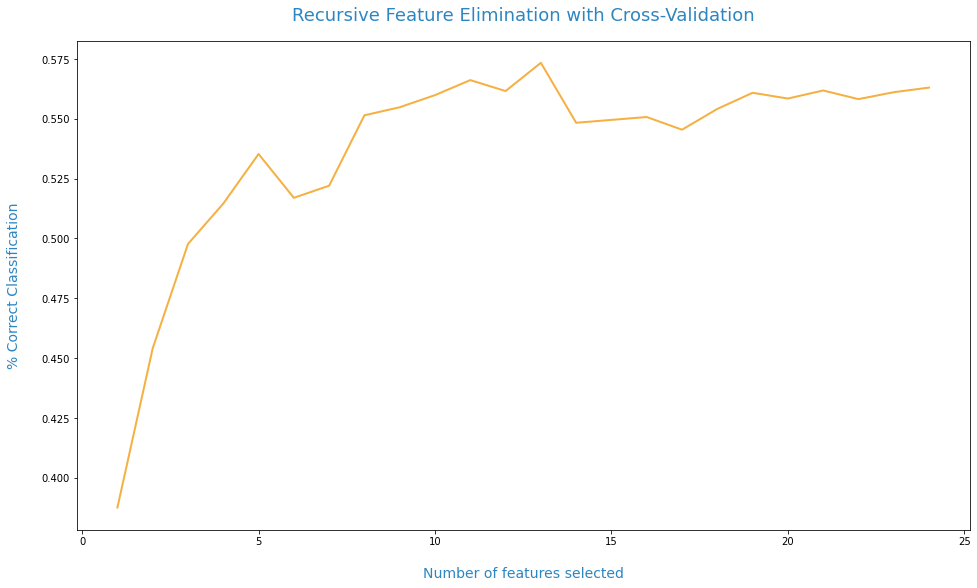

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', color='#2E86C1',fontsize=18, pad=20)
plt.xlabel('Number of features selected', fontsize=14,color='#2E86C1', labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, color='#2E86C1',labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#F5B041', linewidth=2)
plt.show()

In [ ]:
print(np.where(rfecv.support_ == False)[0])
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 0  6  8 10 12 14 15 16 17 18 20]


In [ ]:
X.describe()
X.to_csv('REM_New.csv')

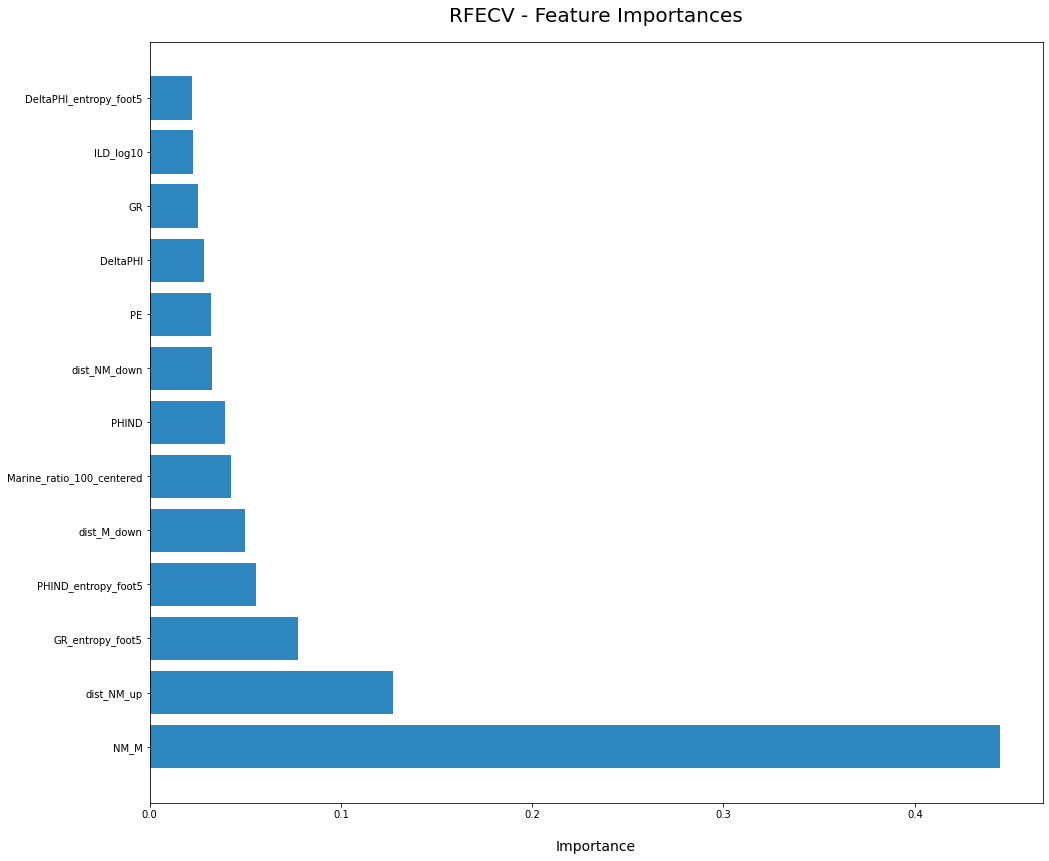

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#2E86C1')
plt.title('RFECV - Feature Importances', fontsize=20, pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()